In [1]:
from __future__ import division, absolute_import

import os
import sys
import random

import numpy as np

#root
absPath = '/home/angela/padding_EBI/'
sys.path.insert(0, absPath)

#from src.Target import TargetÇ

np.random.seed(8)
random.seed(8)

from src.preprocessing import *
from src.model_architecture import *
from src.training_model import *
from src.postprocessing import *
%matplotlib inline

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# pre-processing

In [3]:
list_paddings = ['post_padding', 'pre_padding', 'mid_padding', 'stretch_padding', 'ext_padding', 'rdm_padding']

In [4]:
#loading data
file_in= "".join(['/home/angela/padding_uniprot/', 'raw_data/uniprot-reviewed_yes+AND+taxonomy_archaea-EC.tab.gz'])
df_ori = loading_data(file_in, 'EC number')

#creating dataset for the test
df = pd.DataFrame(columns=['Entry', 'Sequence', 'EC number'])
for i in ['nan', '1.', '2.', '3.', '4.', '5.', '6.', '7.']:
    df_u = df_ori[df_ori['EC number'].str.startswith(i)][:20]
    df = pd.concat([df, df_u])

In [5]:
df.sample(frac=1).reset_index().drop('index', axis=1)

,Entry,Sequence,EC number
0,Q8TPF4,MMIAGIDEAGKGPVIGPMCIGGVKIEESRAHILKVLGVADSKKLTP...,3.1.26.4
1,O50083,MNVEEMKKIAAKEALKFIEDDMVIGLGTGSTTAYFIKLLGEKLKRG...,5.3.1.6
2,Q9Y8T0,MPSPPEPPLHWRDCRLEPILGFPRPRELAKSLEVQGEEWIALLESG...,4.1.3.27
3,A3CVJ3,MGSQWTKDSVYRKAMKAGYRARAAYKLLEIQQRNGIIRPDDNVVDL...,2.1.1.166
4,Q6L1E2,MNRKDKYYIRAKRENYRSRASYKIIEINNKYNIVSRGDNVLEFGSS...,2.1.1.166
5,O05207,MSAKEKFTSLSPAEFFKRNPELAGFPNPARALYQTVRELIENSLDA...,5.6.2.3
6,Q74M51,MVSVDQVKKAREGKKRRFTQTFELIFNLKNVDLRKYRLSTYIVLPR...,nan
7,C3MYZ9,MSIDQRLQLITRNAAEIITIDELRKKLESEEKLKGYIGFEPSGLFH...,6.1.1.1
8,Q5JH35,MAFDRQKLVEAVKEAKARAKPRNFTQTVEMAVNLKDVDLRKPENRF...,nan
9,Q58424,MVKILVTDPLHEDAIKILEEVGEVEVATGLTKEELLEKIKDADVLV...,1.1.1.95


(1248, 592)


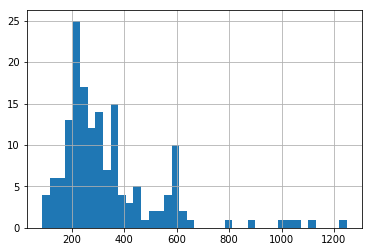

In [6]:
#max len
max_len = looking_max_len(df)
print(max_len)

In [7]:
max_lenn = max_len[1]
df_filt = filtering_over_maxlen(df, max_lenn)

In [8]:
df_filt

,Entry,Sequence,EC number
0,Q6L1A8,MKTPPVLKRRREGVTDYRKRYRLVISRETRAVIRQTRKGLIIQLVD...,nan
1,B1L784,MDLEYQKKLAAKVAGVGLDRVRINPEKIDLVSEAVTRADIRRLIRS...,nan
2,B1L6L3,MSKLLTESDSLKVIRRILEGSPKRRFNEAVDLVVVLRGIDLKRDPN...,nan
3,Q5JH35,MAFDRQKLVEAVKEAKARAKPRNFTQTVEMAVNLKDVDLRKPENRF...,nan
4,Q74M51,MVSVDQVKKAREGKKRRFTQTFELIFNLKNVDLRKYRLSTYIVLPR...,nan
5,O74001,MVQKPHSFRRKTRKKLRKHPRRRGLPPLTRFLQEFEVGQKVHIVIE...,nan
6,A1RS24,MVKRTHGYRYKSRKLLRKKPRERGLSGLSRLLYEYKPGDRVVIDID...,nan
7,Q5JDH1,MDPYKVIIRPLVTEKAVSLIERENKLTFIVDRRATKQDIKRAVEEM...,nan
8,Q975K6,MPNPHYRSTSYRKIHTKLPSGKSTIHYERRKNNRAVCAICKKPLQG...,nan
9,A4FVY1,MNVKVYNLDGSEKGDIELPAVFETEYRPDLIKRAVISSLTAKLQPK...,nan


In [9]:
dicti = creating_dict()

In [10]:
dicti

{'0': 0,
 'A': 1,
 'B': 2,
 'C': 3,
 'D': 4,
 'E': 5,
 'F': 6,
 'G': 7,
 'H': 8,
 'I': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16,
 'R': 17,
 'S': 18,
 'T': 19,
 'U': 20,
 'V': 21,
 'W': 22,
 'X': 23,
 'Y': 24,
 'Z': 25}

In [11]:
dicti_padding = {}
for i in list_paddings:
    dicti_padding[i] = processing_sequences(df_filt, i, max_lenn)

0      MKTPPVLKRRREGVTDYRKRYRLVISRETRAVIRQTRKGLIIQLVD...
1      MDLEYQKKLAAKVAGVGLDRVRINPEKIDLVSEAVTRADIRRLIRS...
2      MSKLLTESDSLKVIRRILEGSPKRRFNEAVDLVVVLRGIDLKRDPN...
3      MAFDRQKLVEAVKEAKARAKPRNFTQTVEMAVNLKDVDLRKPENRF...
4      MVSVDQVKKAREGKKRRFTQTFELIFNLKNVDLRKYRLSTYIVLPR...
5      MVQKPHSFRRKTRKKLRKHPRRRGLPPLTRFLQEFEVGQKVHIVIE...
6      MVKRTHGYRYKSRKLLRKKPRERGLSGLSRLLYEYKPGDRVVIDID...
7      MDPYKVIIRPLVTEKAVSLIERENKLTFIVDRRATKQDIKRAVEEM...
8      MPNPHYRSTSYRKIHTKLPSGKSTIHYERRKNNRAVCAICKKPLQG...
9      MNVKVYNLDGSEKGDIELPAVFETEYRPDLIKRAVISSLTAKLQPK...
10     MNVKVYNLDGSEKGDIELPAVFETEYRPDLIKRAVISSLTAKLQPK...
11     MNVKVYNLDGSEKGDIELPAVFETEYRPDLIKRAVISSLTAKLQPK...
12     MKANVYSMEGEVKEEIELPAIFNEEYRPDLIKRAVISAQTARVQPW...
13     MKVKVFNLEGEPVEEIELPKVFSTPFRPDLIRRAVIASWTHRIQPQ...
14     MYLELVKKNSVILDKDGNKVKEVELPFIFSFPVRKDIIRRVFLAEF...
15     MYLELVKKNSVILDKDGNKVKEVELPFIFSFPVRKDIIRRVFLAEF...
16     MQAVEMEKKAGNENPMREVVLDKVVINIGVGESGERHKKAYSLLEE...
17     MPAIDLSTIDLRAIKPSDLDWRKF

In [12]:
dicti_padding['ext_padding']

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [13]:
# creating binary enzyme/no enzyme label
df_bin = binarizing_EC(df_filt)

1.0    122
0.0     20
Name: enzyme, dtype: int64


In [14]:
df_bin

,Entry,Sequence,EC number,target,enzyme
0,Q6L1A8,MKTPPVLKRRREGVTDYRKRYRLVISRETRAVIRQTRKGLIIQLVD...,nan,<src.Target.Target object at 0x7f60c22bc6a0>,0.0
1,B1L784,MDLEYQKKLAAKVAGVGLDRVRINPEKIDLVSEAVTRADIRRLIRS...,nan,<src.Target.Target object at 0x7f60c22bc9e8>,0.0
2,B1L6L3,MSKLLTESDSLKVIRRILEGSPKRRFNEAVDLVVVLRGIDLKRDPN...,nan,<src.Target.Target object at 0x7f60c2263be0>,0.0
3,Q5JH35,MAFDRQKLVEAVKEAKARAKPRNFTQTVEMAVNLKDVDLRKPENRF...,nan,<src.Target.Target object at 0x7f60c22b2cc0>,0.0
4,Q74M51,MVSVDQVKKAREGKKRRFTQTFELIFNLKNVDLRKYRLSTYIVLPR...,nan,<src.Target.Target object at 0x7f60c22b2358>,0.0
5,O74001,MVQKPHSFRRKTRKKLRKHPRRRGLPPLTRFLQEFEVGQKVHIVIE...,nan,<src.Target.Target object at 0x7f60c225ca20>,0.0
6,A1RS24,MVKRTHGYRYKSRKLLRKKPRERGLSGLSRLLYEYKPGDRVVIDID...,nan,<src.Target.Target object at 0x7f60c29a6518>,0.0
7,Q5JDH1,MDPYKVIIRPLVTEKAVSLIERENKLTFIVDRRATKQDIKRAVEEM...,nan,<src.Target.Target object at 0x7f60c29a6208>,0.0
8,Q975K6,MPNPHYRSTSYRKIHTKLPSGKSTIHYERRKNNRAVCAICKKPLQG...,nan,<src.Target.Target object at 0x7f60c29a6240>,0.0
9,A4FVY1,MNVKVYNLDGSEKGDIELPAVFETEYRPDLIKRAVISSLTAKLQPK...,nan,<src.Target.Target object at 0x7f60c2250550>,0.0


In [15]:
df_digit1 = first_digit_EC(df_bin)

In [16]:
df_digit1

,Entry,Sequence,EC number,target,enzyme,digit1
0,Q6L1A8,MKTPPVLKRRREGVTDYRKRYRLVISRETRAVIRQTRKGLIIQLVD...,nan,<src.Target.Target object at 0x7f60c22bc6a0>,0.0,[nan]
1,B1L784,MDLEYQKKLAAKVAGVGLDRVRINPEKIDLVSEAVTRADIRRLIRS...,nan,<src.Target.Target object at 0x7f60c22bc9e8>,0.0,[nan]
2,B1L6L3,MSKLLTESDSLKVIRRILEGSPKRRFNEAVDLVVVLRGIDLKRDPN...,nan,<src.Target.Target object at 0x7f60c2263be0>,0.0,[nan]
3,Q5JH35,MAFDRQKLVEAVKEAKARAKPRNFTQTVEMAVNLKDVDLRKPENRF...,nan,<src.Target.Target object at 0x7f60c22b2cc0>,0.0,[nan]
4,Q74M51,MVSVDQVKKAREGKKRRFTQTFELIFNLKNVDLRKYRLSTYIVLPR...,nan,<src.Target.Target object at 0x7f60c22b2358>,0.0,[nan]
5,O74001,MVQKPHSFRRKTRKKLRKHPRRRGLPPLTRFLQEFEVGQKVHIVIE...,nan,<src.Target.Target object at 0x7f60c225ca20>,0.0,[nan]
6,A1RS24,MVKRTHGYRYKSRKLLRKKPRERGLSGLSRLLYEYKPGDRVVIDID...,nan,<src.Target.Target object at 0x7f60c29a6518>,0.0,[nan]
7,Q5JDH1,MDPYKVIIRPLVTEKAVSLIERENKLTFIVDRRATKQDIKRAVEEM...,nan,<src.Target.Target object at 0x7f60c29a6208>,0.0,[nan]
8,Q975K6,MPNPHYRSTSYRKIHTKLPSGKSTIHYERRKNNRAVCAICKKPLQG...,nan,<src.Target.Target object at 0x7f60c29a6240>,0.0,[nan]
9,A4FVY1,MNVKVYNLDGSEKGDIELPAVFETEYRPDLIKRAVISSLTAKLQPK...,nan,<src.Target.Target object at 0x7f60c2250550>,0.0,[nan]


There are  0 samples with more than one label
The unique labels are  ['nan', '1', '2', '3', '4', '5', '6', '7']


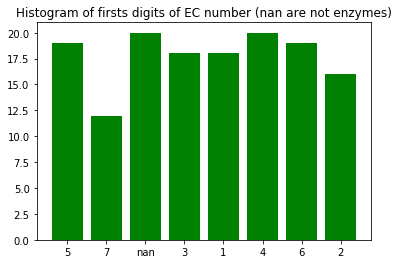

In [17]:
counting_multilabel(df_digit1)

In [18]:
ec_multilabel = encoding_as_multilabel(df_digit1, 'prueba/')

(7,)
Shape of the resulting encoding (142, 7)


In [19]:
ec_multilabel

array([[0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
 

In [20]:
data_to_hdf5('prueba/', 'data.h5', list_paddings, dicti_padding, np.array(df_digit1['enzyme']), ec_multilabel)

In [21]:
splitting_sets(0.8, 0.5, dicti_padding['post_padding'], ec_multilabel, 'prueba/', kfold_bool=True, n_splits=3)

In [22]:
len(dicti_padding['post_padding'])

142

In [23]:
ec_multilabel.shape

(142, 7)

In [24]:
# defining deep learning model
n_class = 2 #number of classes to output
drop_per = 0.2 #Input dropout 
n_neur = [314,77,8]
drop_hid = 0.5
dict_size = len(dicti)

In [26]:
#model = building_3dense_model_task1(max_lenn, dict_size, n_neur, n_class, drop_per, drop_hid, 'softmax', 'prueba/')
#model = building_1convdense_model_task1(max_lenn, dict_size, n_neur, n_class, drop_per, drop_hid, 10, 6,'softmax', 'prueba/')
model = building_stackconv_model_task1(max_lenn, dict_size, n_neur, n_class, drop_per, drop_hid, 10, [1,3,5,9,15], 10, 'softmax', 'prueba/')

AttributeError: 'NoneType' object has no attribute '_inbound_nodes'

In [ ]:
len(dicti_padding)

In [ ]:
isinstance(ec_multilabel, np.ndarray)